## Data Collection using WebScraping Technique

In [200]:
import requests
import re
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
url="https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav"

In [202]:
req_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}

In [203]:
req=requests.get(url,headers=req_header)

In [204]:
from bs4 import BeautifulSoup


In [205]:
soup = BeautifulSoup(req.text, "html.parser")

In [206]:
soup.find("div",class_="companyCardWrapper__primaryInformation").text               #container-two-col

' \n\t\t\t\t\t\t\t\t\tTCS\n\t\t\t\t\t\t\t\t   Follow      \n\t\t\t3.4 \n\t\t\t\t\t\t\t\t(1.1L)\n\t\t\t\t\t\t\t \n\t\t\t\t\t\t\tIT Services & Consulting | Bangalore / Bengaluru +436 other locations\n\t\t\t\t\t\t   Highly Rated For Job Security  Critically Rated For Promotions / Appraisal, Salary & Benefits, Work Satisfaction To view salary insights \n\t\t\t\t\t\t\tSelect designation\n\t\t\t\t\t\t '

In [207]:
Company_name=[]
Ratings=[]
Services=[]
Location=[]
Salaries=[]
Interviews=[]
Jobs=[]
Benefits=[]
for i in range(1,26):
    url=f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={i}"
    req_header={'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    req=requests.get(url,headers=req_header)
    print(req)
    soup = BeautifulSoup(req.text, "html.parser")

    #main container of the company
    for i in soup.find_all("div",class_="companyCardWrapper"):

        #company name
        company_name=i.find("div",class_="companyCardWrapper__companyPrimaryDetailsTopSection")
        if company_name:
            Company_name.append(company_name.text.strip())
        else:
            Company_name.append(np.nan)

        #ratings
        ratings=i.find("div",class_="rating_text rating_text--md").text
        if ratings:
            Ratings.append(ratings.strip())
        else:
            Ratings.append(np.nan)

        #services
        services = i.find("span", class_="companyCardWrapper__interLinking").text.strip()
        match = re.findall(r'([A-Za-z &]+)\s*\|', services)
        if match:
            Services.append(match[0])
        else:
            Services.append(np.nan)

        #location
        location=i.find("span", class_="companyCardWrapper__interLinking").text.strip()
        pattern=re.findall(r"\|\s*([^/+]+)",location)
        if pattern:
            Location.append(pattern[0])
        else:
            Location.append(np.nan)

        #description of companies
        description = i.find("div",class_="companyCardWrapper__tertiaryInformation").text

        #salaries
        salaries=re.findall(r"Reviews\s*([\d\.]+[kKL]?)\s*Salaries",description)
        if salaries:
            Salaries.append(salaries[0])
        else:
            Salaries.append(np.nan)

        #interviews
        interviews=re.findall(r"(\d+(?:\.\d+)?[kK]?)\s*Interviews",description)
        if interviews:
            Interviews.append(interviews[0])
        else:
            Interviews.append(np.nan)

        #jobs
        jobs=re.findall(r"(\d+(?:\.\d+)?[kK]?)\s*Jobs",description)
        if jobs:
            Jobs.append(jobs[0])
        else:
            Jobs.append(np.nan)

        #benefits
        benefits=re.findall(r"(\d+(?:\.\d+)?[kK]?)\s*Benefits",description)
        if benefits:
            Benefits.append(benefits[0])
        else:
            Benefits.append(np.nan)              


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [209]:
doc={"Company_name":Company_name,"Ratings":Ratings,"Services":Services,"Location":Location,"Salaries":Salaries,
     "Interviews":Interviews,"Jobs":Jobs,"Benefits":Benefits}
df=pd.DataFrame(doc)
df     

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,9.6L,11.6k,1.7k,10.6k
1,Accenture,3.7,IT Services & Consulting,Bangalore,6.4L,9k,39.7k,6.7k
2,Wipro,3.6,IT Services & Consulting,Hyderabad,4.7L,6.4k,5.7k,4.6k
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,5.9L,6.2k,903,5.5k
4,Capgemini,3.7,IT Services & Consulting,Bangalore,4.7L,5.3k,2.1k,3.6k
...,...,...,...,...,...,...,...,...
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9.9k,126,22,243
496,Microland,3.5,IT Services & Consulting,Bangalore,10.6k,142,577,158
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4.3k,163,60,192
498,Uflex,3.8,Packaging,Noida,6.6k,125,63,117


### Collected Data Saving into CSV Format

In [210]:
df.to_csv("analysis on top 500 companies.csv",index=False)

### Read Collected Data from CSV Format

In [211]:
df=pd.read_csv("analysis on top 500 companies.csv")
df

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,9.6L,11.6k,1.7k,10.6k
1,Accenture,3.7,IT Services & Consulting,Bangalore,6.4L,9k,39.7k,6.7k
2,Wipro,3.6,IT Services & Consulting,Hyderabad,4.7L,6.4k,5.7k,4.6k
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,5.9L,6.2k,903,5.5k
4,Capgemini,3.7,IT Services & Consulting,Bangalore,4.7L,5.3k,2.1k,3.6k
...,...,...,...,...,...,...,...,...
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9.9k,126,22,243
496,Microland,3.5,IT Services & Consulting,Bangalore,10.6k,142,577,158
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4.3k,163,60,192
498,Uflex,3.8,Packaging,Noida,6.6k,125,63,117


---

##### Importing Libraries

In [212]:
import pandas as pd
import numpy as np

### Data Exploration

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_name  500 non-null    object 
 1   Ratings       500 non-null    float64
 2   Services      499 non-null    object 
 3   Location      499 non-null    object 
 4   Salaries      500 non-null    object 
 5   Interviews    500 non-null    object 
 6   Jobs          431 non-null    object 
 7   Benefits      500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [215]:
df.head()

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,9.6L,11.6k,1.7k,10.6k
1,Accenture,3.7,IT Services & Consulting,Bangalore,6.4L,9k,39.7k,6.7k
2,Wipro,3.6,IT Services & Consulting,Hyderabad,4.7L,6.4k,5.7k,4.6k
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,5.9L,6.2k,903,5.5k
4,Capgemini,3.7,IT Services & Consulting,Bangalore,4.7L,5.3k,2.1k,3.6k


In [216]:
df.tail()

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9.9k,126,22,243
496,Microland,3.5,IT Services & Consulting,Bangalore,10.6k,142,577,158
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4.3k,163,60,192
498,Uflex,3.8,Packaging,Noida,6.6k,125,63,117
499,Philips,3.8,Medical Equipment,Bangalore,10.7k,175,113,180


In [217]:
df.shape

(500, 8)

In [218]:
df.columns

Index(['Company_name', 'Ratings', 'Services', 'Location', 'Salaries',
       'Interviews', 'Jobs', 'Benefits'],
      dtype='object')

In [219]:
df.describe()

,Ratings
count,500.000000
mean,3.807800
std,0.298492
min,2.700000
25%,3.600000
50%,3.900000
75%,4.000000
max,4.900000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_name  500 non-null    object 
 1   Ratings       500 non-null    float64
 2   Services      499 non-null    object 
 3   Location      499 non-null    object 
 4   Salaries      500 non-null    object 
 5   Interviews    500 non-null    object 
 6   Jobs          431 non-null    object 
 7   Benefits      500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [221]:
def convert_salary(value):
    if pd.isna(value):
        return np.nan

    value = str(value).replace(',', '').strip()

    if value.endswith('k'):
        return float(value[:-1]) * 1000

    if value.endswith('L'):
        return float(value[:-1]) * 100000

    return float(value)


In [222]:
df = df.copy()
cols = ['Salaries', 'Interviews', 'Jobs', 'Benefits','Ratings']
for col in cols:
    df[col] = df[col].apply(convert_salary)

In [223]:
df.isnull().sum()

Company_name     0
Ratings          0
Services         1
Location         1
Salaries         0
Interviews       0
Jobs            69
Benefits         0
dtype: int64

In [224]:
df.duplicated().any()

np.False_

### Data Cleaning

#### Handling Missing Values

In [225]:
# Fill numeric-like nulls
df['Interviews'] = df['Interviews'].fillna(df['Interviews'].median())
df['Jobs'] = df['Jobs'].fillna(df['Jobs'].median())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].median())

# If any categorical columns have nulls (mode)
df['Services'] = df['Services'].fillna(df['Services'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

# Verify
print(df.isnull().sum())

Company_name    0
Ratings         0
Services        0
Location        0
Salaries        0
Interviews      0
Jobs            0
Benefits        0
dtype: int64


In [226]:
df.head(10)

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,960000.0,11600.0,1700.0,10600.0
1,Accenture,3.7,IT Services & Consulting,Bangalore,640000.0,9000.0,39700.0,6700.0
2,Wipro,3.6,IT Services & Consulting,Hyderabad,470000.0,6400.0,5700.0,4600.0
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,590000.0,6200.0,903.0,5500.0
4,Capgemini,3.7,IT Services & Consulting,Bangalore,470000.0,5300.0,2100.0,3600.0
5,HDFC Bank,3.8,Banking,Mumbai,150000.0,2800.0,244.0,3200.0
6,Infosys,3.5,IT Services & Consulting,Bangalore,510000.0,8200.0,2200.0,4800.0
7,ICICI Bank,4.0,Banking,Mumbai,150000.0,2800.0,31.0,3700.0
8,HCLTech,3.4,IT Services & Consulting,Chennai,370000.0,4400.0,293.0,3800.0
9,Tech Mahindra,3.4,IT Services & Consulting,Hyderabad,280000.0,4400.0,435.0,3400.0


In [227]:
df.tail(10)

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
490,Narayana Health,3.9,Healthcare,Bangalore,5800.0,88.0,92.0,143.0
491,Honeywell Automation,3.7,Industrial Automation,Pune,11800.0,129.0,49.0,159.0
492,Google,4.4,Software Product,Bangalore,29300.0,979.0,471.0,131.0
493,Manipal Hospitals,4.0,Healthcare,Bangalore,6400.0,125.0,97.0,131.0
494,Parle Products,3.9,FMCG,Mumbai,3700.0,111.0,10.0,201.0
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9900.0,126.0,22.0,243.0
496,Microland,3.5,IT Services & Consulting,Bangalore,10600.0,142.0,577.0,158.0
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4300.0,163.0,60.0,192.0
498,Uflex,3.8,Packaging,Noida,6600.0,125.0,63.0,117.0
499,Philips,3.8,Medical Equipment,Bangalore,10700.0,175.0,113.0,180.0


In [228]:
df.dtypes

Company_name     object
Ratings         float64
Services         object
Location         object
Salaries        float64
Interviews      float64
Jobs            float64
Benefits        float64
dtype: object

### Data Type Conversion

In [229]:
# Convert categorical columns
df['Services'] = df['Services'].astype('category')
df['Location'] = df['Location'].astype('category')

# Convert numeric columns
df['Salaries'] = df['Salaries'].astype(int)         
df['Interviews'] = df['Interviews'].astype('Int64') 
df['Jobs'] = df['Jobs'].round(0).astype('Int64')
df['Benefits'] = df['Benefits'].astype('Int64')

# Check the datatypes
print(df.dtypes)

Company_name      object
Ratings          float64
Services        category
Location        category
Salaries           int64
Interviews         Int64
Jobs               Int64
Benefits           Int64
dtype: object


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company_name  500 non-null    object  
 1   Ratings       500 non-null    float64 
 2   Services      500 non-null    category
 3   Location      500 non-null    category
 4   Salaries      500 non-null    int64   
 5   Interviews    500 non-null    Int64   
 6   Jobs          500 non-null    Int64   
 7   Benefits      500 non-null    Int64   
dtypes: Int64(3), category(2), float64(1), int64(1), object(1)
memory usage: 29.9+ KB


In [231]:
df

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,960000,11600,1700,10600
1,Accenture,3.7,IT Services & Consulting,Bangalore,640000,9000,39700,6700
2,Wipro,3.6,IT Services & Consulting,Hyderabad,470000,6400,5700,4600
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,590000,6200,903,5500
4,Capgemini,3.7,IT Services & Consulting,Bangalore,470000,5300,2100,3600
...,...,...,...,...,...,...,...,...
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9900,126,22,243
496,Microland,3.5,IT Services & Consulting,Bangalore,10600,142,577,158
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4300,163,60,192
498,Uflex,3.8,Packaging,Noida,6600,125,63,117


In [232]:
df.isnull().sum()

Company_name    0
Ratings         0
Services        0
Location        0
Salaries        0
Interviews      0
Jobs            0
Benefits        0
dtype: int64

In [233]:
df.shape

(500, 8)

In [234]:
df.head(10)

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,960000,11600,1700,10600
1,Accenture,3.7,IT Services & Consulting,Bangalore,640000,9000,39700,6700
2,Wipro,3.6,IT Services & Consulting,Hyderabad,470000,6400,5700,4600
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,590000,6200,903,5500
4,Capgemini,3.7,IT Services & Consulting,Bangalore,470000,5300,2100,3600
5,HDFC Bank,3.8,Banking,Mumbai,150000,2800,244,3200
6,Infosys,3.5,IT Services & Consulting,Bangalore,509999,8200,2200,4800
7,ICICI Bank,4.0,Banking,Mumbai,150000,2800,31,3700
8,HCLTech,3.4,IT Services & Consulting,Chennai,370000,4400,293,3800
9,Tech Mahindra,3.4,IT Services & Consulting,Hyderabad,280000,4400,435,3400


In [235]:
df.tail(10)

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
490,Narayana Health,3.9,Healthcare,Bangalore,5800,88,92,143
491,Honeywell Automation,3.7,Industrial Automation,Pune,11800,129,49,159
492,Google,4.4,Software Product,Bangalore,29300,979,471,131
493,Manipal Hospitals,4.0,Healthcare,Bangalore,6400,125,97,131
494,Parle Products,3.9,FMCG,Mumbai,3700,111,10,201
495,R.R. Donnelley,3.7,Marketing & Advertising,Chennai,9900,126,22,243
496,Microland,3.5,IT Services & Consulting,Bangalore,10600,142,577,158
497,Dr Lal PathLabs,4.2,Healthcare,New Delhi,4300,163,60,192
498,Uflex,3.8,Packaging,Noida,6600,125,63,117
499,Philips,3.8,Medical Equipment,Bangalore,10700,175,113,180


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company_name  500 non-null    object  
 1   Ratings       500 non-null    float64 
 2   Services      500 non-null    category
 3   Location      500 non-null    category
 4   Salaries      500 non-null    int64   
 5   Interviews    500 non-null    Int64   
 6   Jobs          500 non-null    Int64   
 7   Benefits      500 non-null    Int64   
dtypes: Int64(3), category(2), float64(1), int64(1), object(1)
memory usage: 29.9+ KB


In [237]:
df.describe()

,Ratings,Salaries,Interviews,Jobs,Benefits
count,500.000000,500.000000,500.0,500.0,500.0
mean,3.807800,28180.548000,491.576,247.124,480.162
std,0.298492,74181.527646,1008.882952,1829.75199,834.166547
min,2.700000,61.000000,52.0,1.0,1.0
25%,3.600000,8275.000000,163.0,19.0,183.0
50%,3.900000,12050.000000,243.0,49.0,268.0
75%,4.000000,22100.000000,405.75,115.75,439.5
max,4.900000,960000.000000,11600.0,39700.0,10600.0


In [238]:
df['Company_name'].value_counts()

Company_name
Philips                        1
TCS                            1
Accenture                      1
Wipro                          1
Infinite Computer Solutions    1
                              ..
HCLTech                        1
ICICI Bank                     1
Infosys                        1
HDFC Bank                      1
Capgemini                      1
Name: count, Length: 500, dtype: int64

In [239]:
df['Services'].value_counts()

Services
IT Services & Consulting              72
Pharma                                30
Insurance                             26
Internet                              25
Banking                               25
BPO                                   24
NBFC                                  23
Financial Services                    22
Automobile                            18
Engineering & Construction            17
Auto Components                       16
Consumer Electronics & Appliances     15
Retail                                14
Logistics                             13
Healthcare                            11
Telecom                               11
Software Product                      10
FMCG                                  10
Building Material                      9
EdTech                                 8
Hospitality                            7
Industrial Machinery                   6
Management Consulting                  6
Chemicals                              5
FinTech

In [240]:
df['Location'].value_counts()

Location
Bangalore         111
Mumbai            103
Pune               54
Chennai            43
Hyderabad          43
Gurgaon            32
New Delhi          31
Noida              22
Kolkata             9
Ahmedabad           7
Haridwar            3
Jaipur              3
Visakhapatnam       3
Vadodara            3
Bharuch             3
Indore              2
Aurangabad          2
Hosur               2
Bhopal              1
Beawar              1
Ankleshwar          1
Ballari             1
Angul               1
Anantapur           1
Hoshiarpur          1
Guwahati            1
Kanpur              1
Jamshedpur          1
Jamnagar            1
Jajpur              1
Greater Noida       1
Faridabad           1
Nagpur              1
Lucknow             1
New York            1
Neemrana            1
Mundra              1
Patna               1
Surat               1
Sambalpur           1
Thrissur            1
Varanasi            1
Name: count, dtype: int64

In [241]:
df.head(10)

,Company_name,Ratings,Services,Location,Salaries,Interviews,Jobs,Benefits
0,TCS,3.4,IT Services & Consulting,Bangalore,960000,11600,1700,10600
1,Accenture,3.7,IT Services & Consulting,Bangalore,640000,9000,39700,6700
2,Wipro,3.6,IT Services & Consulting,Hyderabad,470000,6400,5700,4600
3,Cognizant,3.7,IT Services & Consulting,Hyderabad,590000,6200,903,5500
4,Capgemini,3.7,IT Services & Consulting,Bangalore,470000,5300,2100,3600
5,HDFC Bank,3.8,Banking,Mumbai,150000,2800,244,3200
6,Infosys,3.5,IT Services & Consulting,Bangalore,509999,8200,2200,4800
7,ICICI Bank,4.0,Banking,Mumbai,150000,2800,31,3700
8,HCLTech,3.4,IT Services & Consulting,Chennai,370000,4400,293,3800
9,Tech Mahindra,3.4,IT Services & Consulting,Hyderabad,280000,4400,435,3400


## Visualizations

### univariate analysis

#### Analysis on single variable at a time

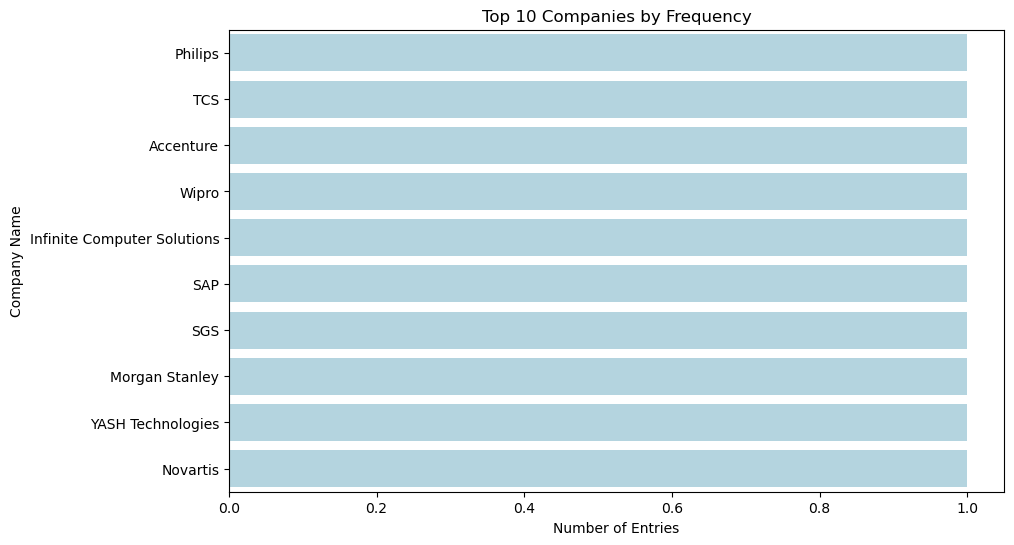

In [242]:
#company_name (categorical column)
# Top 10 companies by frequency
#top10_companies = df['Company_name'].value_counts().head(10)-->use this also same
plt.figure(figsize=(10,6))
sns.countplot(y='Company_name', data=df, order=df['Company_name'].value_counts().head(10).index, color='lightblue')
plt.title('Top 10 Companies by Frequency')
plt.xlabel('Number of Entries')
plt.ylabel('Company Name')
plt.show()

In [170]:
#Above we can see the top 500 companies,there are unique(no duplicates are present).
#the top companies are evenly distributed i.e having equal appearences.
#The top companies are identified by combining them with the other columns.

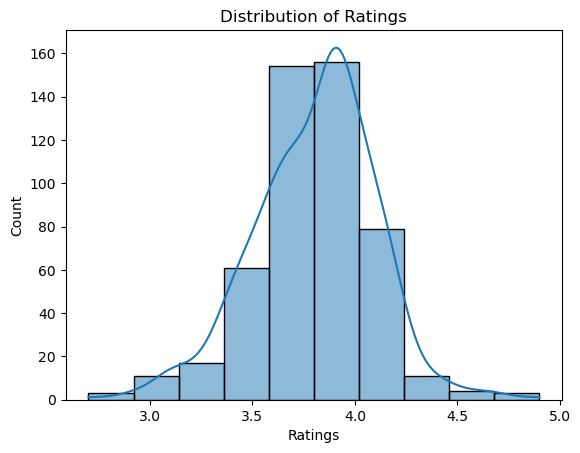

In [171]:
#Ratings (numeric - dependent variable)
sns.histplot(df['Ratings'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()

In [172]:
#Most of the companies are having ratings in between 3.5 and 4.2.
#Few companies have the ratings as outliers that is less than 3 and greater than 4.5.

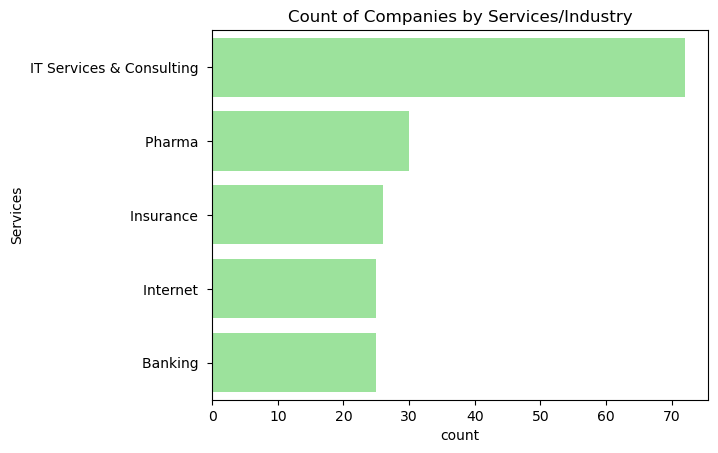

In [173]:
#Services (categorical)
top5_service_names = df['Services'].value_counts().head(5).index
# Filter the dataframe for only these top 5 services
top5_services_df = df[df['Services'].isin(top5_service_names)]
sns.countplot(y='Services', data=top5_services_df, order=top5_service_names,color='lightgreen')
plt.title('Count of Companies by Services/Industry')
plt.show()

In [174]:
#The top most service is the "IT Services and Consulting" where most of the companies are preferred.
#Banking,Internet and Insurance are having the equal level of service count.

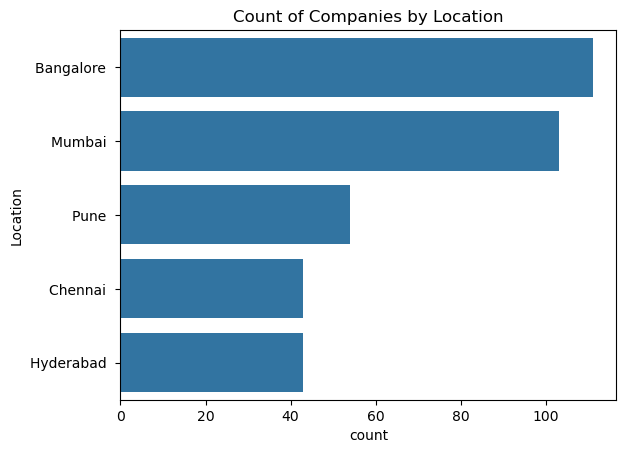

In [175]:
#Location(categorical column)
top5_loc_names = df['Location'].value_counts().head(5).index
# Filter dataframe for only these top 5 locations
top5_loc_df = df[df['Location'].isin(top5_loc_names)]
sns.countplot(y='Location',data=top5_loc_df,order=top5_loc_names)
plt.title('Count of Companies by Location')
plt.show()

In [176]:
#The most preferred locations having companies are Banglore,Mumbai.
#Smaller cities are having fewer companies compared to top-most cities.

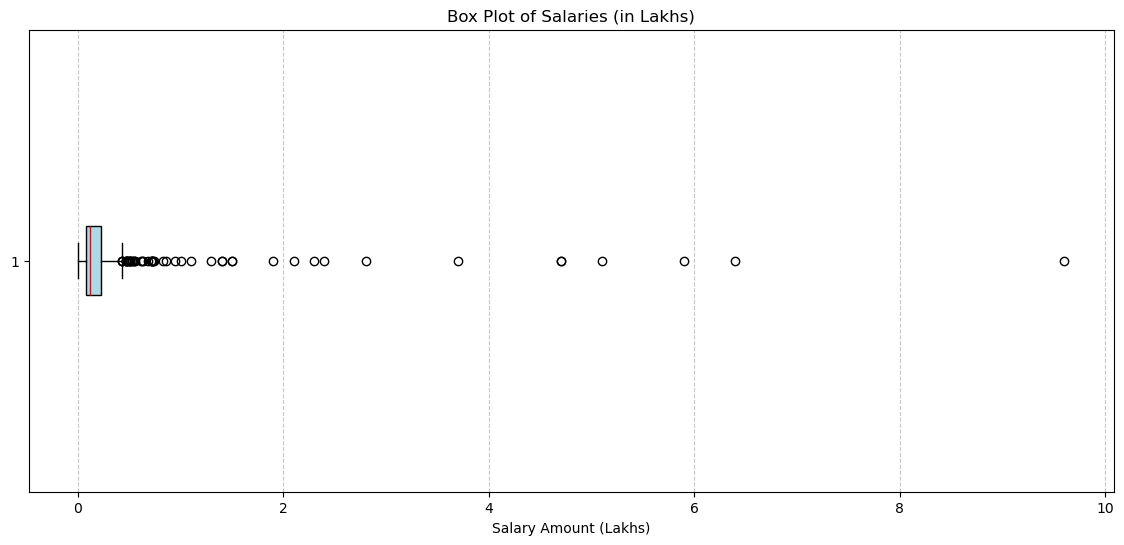

In [177]:
#boxplot of saleries
salaries_in_lakh = df['Salaries'] / 100000
plt.figure(figsize=(14,6))
plt.boxplot(salaries_in_lakh, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'),medianprops=dict(color='red'))
plt.title("Box Plot of Salaries (in Lakhs)")
plt.xlabel("Salary Amount (Lakhs)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


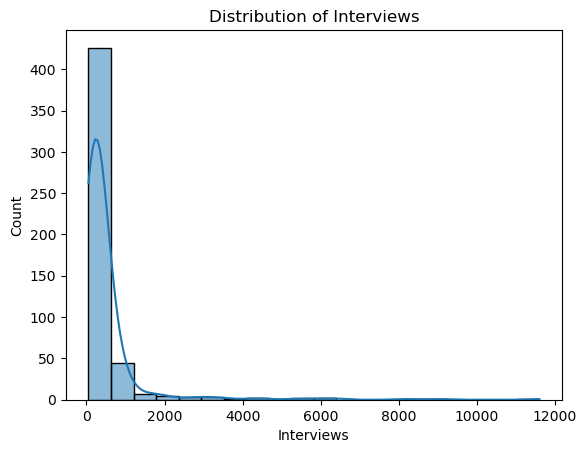

In [178]:
#Interviews (numeric column)
sns.histplot(df['Interviews'], bins=20, kde=True)
plt.title('Distribution of Interviews')
plt.show()


In [179]:
#Most of the companies are taking 10,000 inteviews.
#Very few companies are taking more than 10,000 interviews.
#The Interviews are right-skewed.

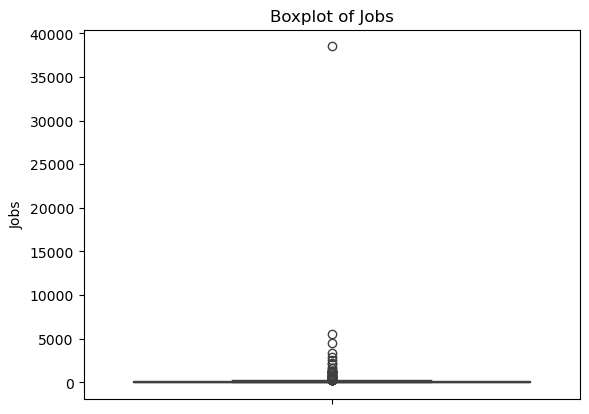

In [180]:
#Jobs (numeric column)
sns.boxplot(df['Jobs'])
plt.title('Boxplot of Jobs')
plt.show()

In [181]:
#most number of job postings are in 10,000.
#some companies are having the outliers i.e,having the highest job postings.

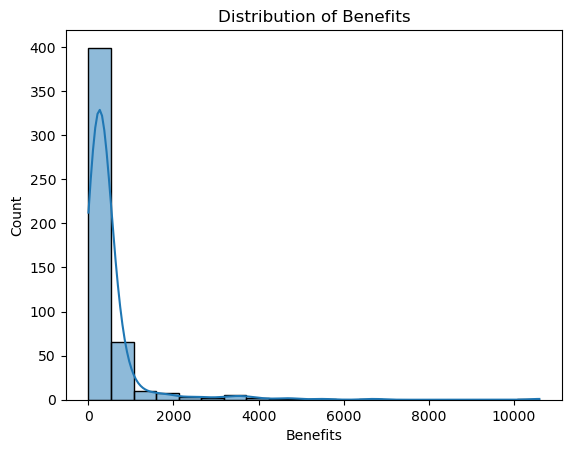

In [182]:
#Benefits(numeric column)
sns.histplot(df['Benefits'], bins=20, kde=True)
plt.title('Distribution of Benefits')
plt.show()

In [183]:
#Top companies are having the highest benefits.
#Most companies provide 1k–5k in “benefits metric”.
#The graph showing the Company benefits is a right_skewed graph.

### Bivariate Analysis

#### Tells us about the relationship between the  one dependent variable and one independent variable.

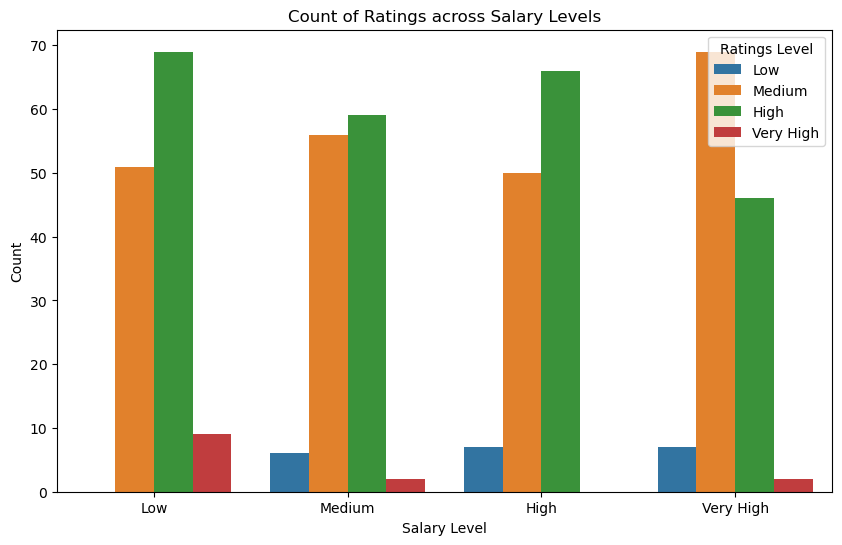

In [184]:
#Ratings vs Salaries
df['Salaries_bin'] = pd.qcut(df['Salaries'], q=4, labels=["Low","Medium","High","Very High"])
plt.figure(figsize=(10,6))
sns.countplot(x='Salaries_bin', hue=pd.cut(df['Ratings'], bins=4, labels=["Low","Medium","High","Very High"]), data=df)
plt.title("Count of Ratings across Salary Levels")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Ratings Level")
plt.show()

In [185]:
#The highest ratings are given to some low rated companies.
#The very high rated companies are giving highest salaries to the lowest number of people.

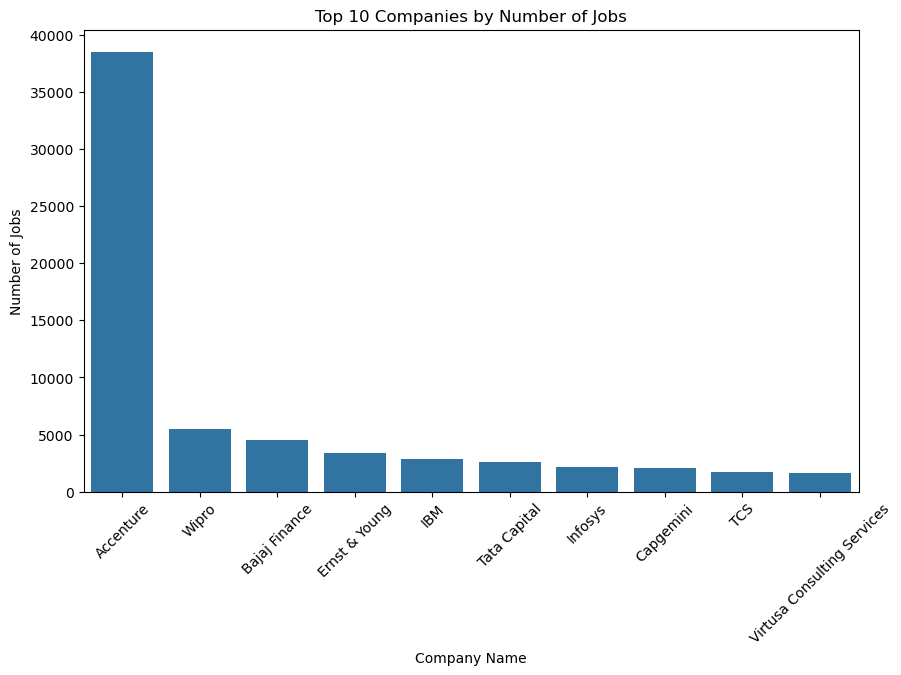

In [186]:
#Top companies vs Jobs
top_10_jobs = df.sort_values(by='Jobs', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Company_name', y='Jobs', data=top_10_jobs)
plt.xticks(rotation=45)
plt.title("Top 10 Companies by Number of Jobs")
plt.xlabel("Company Name")
plt.ylabel("Number of Jobs")
plt.show()

In [187]:
#Accenture is the highest jobs providing company.
#Some companies are maintaining the same level of providing job accuracies.
#Accenture’s 40,000 jobs are far higher than the next highest values (all below 5,000), making it a clear statistical and visual outlier in the dataset.

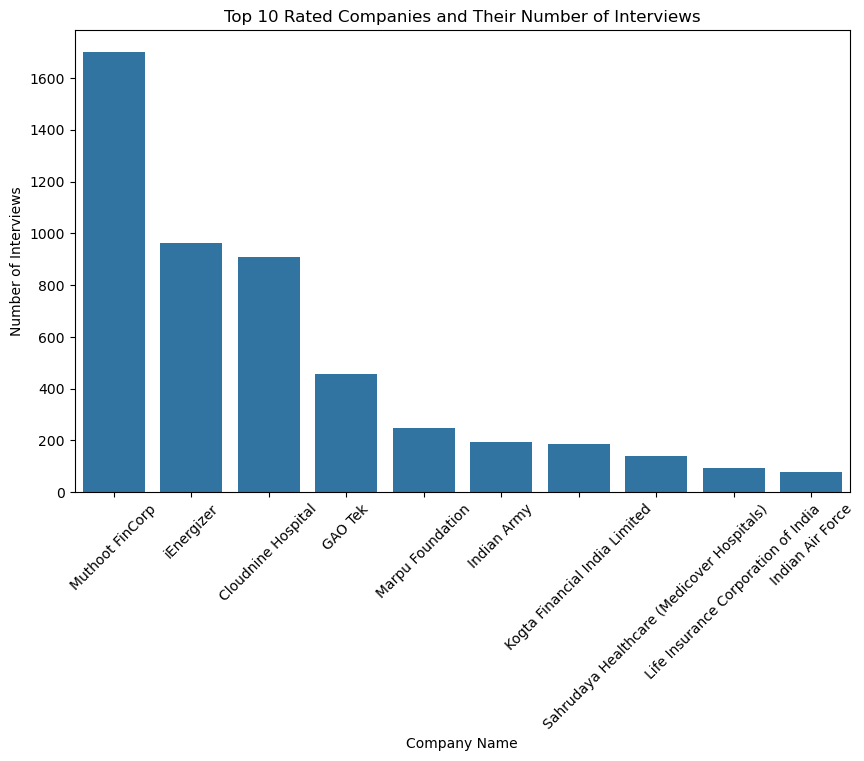

In [188]:
#Top 10 Rated companies vs Their interviews (Ratings vs Interviews)
# Select top 10 companies by Ratings
top_10_rated = df.sort_values(by='Ratings', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Company_name', y='Interviews', data=top_10_rated.sort_values('Interviews', ascending=False))
plt.xticks(rotation=45)
plt.title("Top 10 Rated Companies and Their Number of Interviews")
plt.xlabel("Company Name")
plt.ylabel("Number of Interviews")
plt.show()

In [189]:
#Highest interviews doesnot guarentee better ratings.
#Most of the top rated companies only having interviews less than 1000.
#Companies with very few interview experiences may still have high ratings.

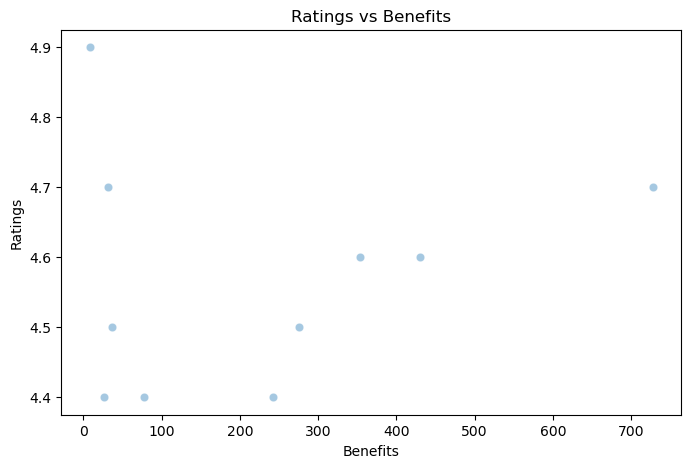

In [190]:
#Ratings vs Benefits
top_10_rated = df.sort_values(by='Ratings', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Benefits', y='Ratings', data=top_10_rated, alpha=0.4)
plt.title('Ratings vs Benefits')
plt.xlabel('Benefits')
plt.ylabel('Ratings')
plt.show()

In [191]:
#Generally, companies offering more benefits tend to have slightly higher ratings.
#Benefits positively influence employee satisfaction, but not the only factor.

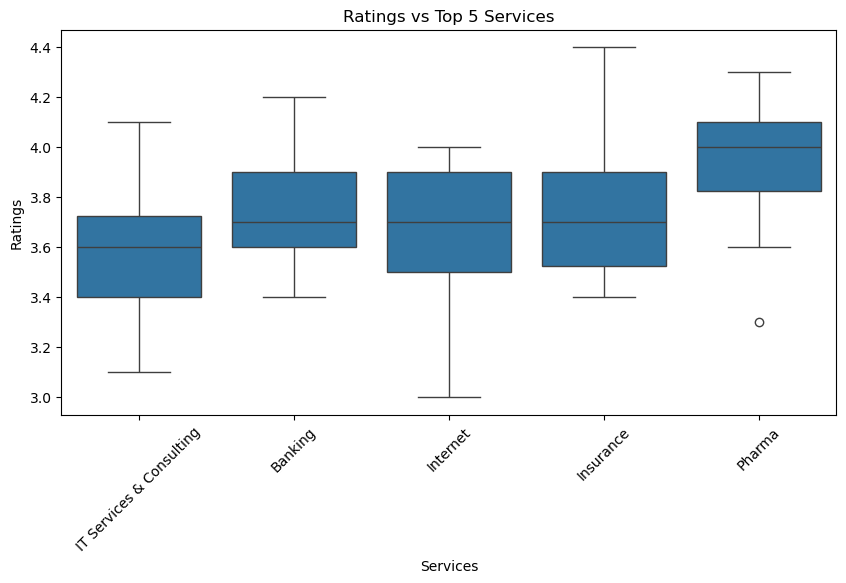

In [192]:
#Ratings vs Categorical variables
#Ratings vs Services
df['Services'] = df['Services'].str.strip()
top5 = df['Services'].value_counts().head(5).index
df_top5 = df[df['Services'].isin(top5)]
plt.figure(figsize=(10,5))
sns.boxplot(x='Services', y='Ratings', data=df_top5)
plt.xticks(rotation=45)
plt.title("Ratings vs Top 5 Services")
plt.show()

In [193]:
#Banking and IT Services dominate the taop 5 industries, and both show a wide range of ratings across companies.
#Presence of outliers in some industries suggests that certain companies perform significantly better or worse than the majority in the same category.

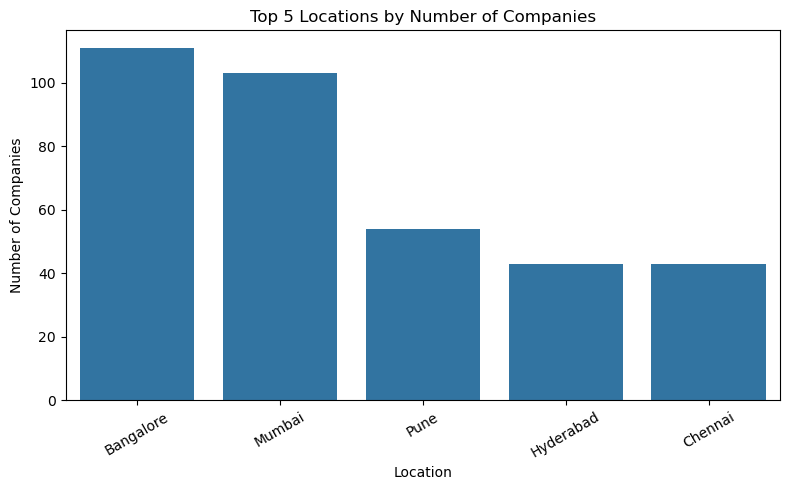

In [194]:
#No.of Companies vs Locations
df['Location'] = df['Location'].str.strip()
# Top 5 locations
top5 = df['Location'].value_counts().head(5).index
df_top5 = df[df['Location'].isin(top5)]
plt.figure(figsize=(8,5))
sns.countplot(x='Location', data=df_top5, order=top5)
plt.title("Top 5 Locations by Number of Companies")
plt.xlabel("Location")
plt.ylabel("Number of Companies")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [195]:
#Banglore is the highest city which is having highest no.of companies.
#Based on the availabilities the number of companies also increases.

### Multivariate Analysis

#### Tells us about the relationship between one dependent variable and multiple independent variables.

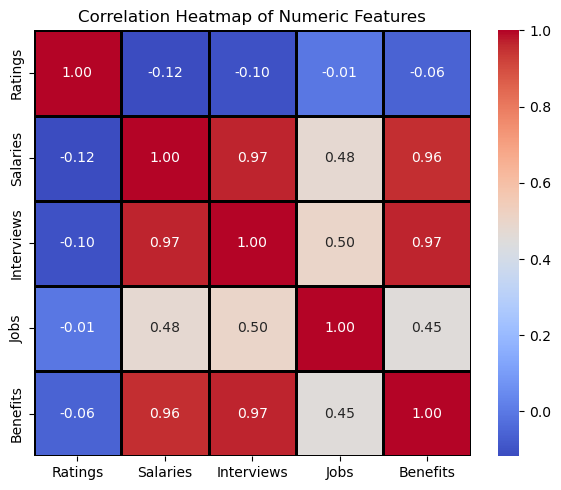

In [196]:
top5_services = df['Services'].value_counts().head(5).index
df_top5 = df[df['Services'].isin(top5_services)]
numeric_only = df_top5.select_dtypes(include='number')
plt.figure(figsize=(6, 5))
sns.heatmap(numeric_only.corr(),annot=True,cmap='coolwarm',linewidths=2,linecolor='black',fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



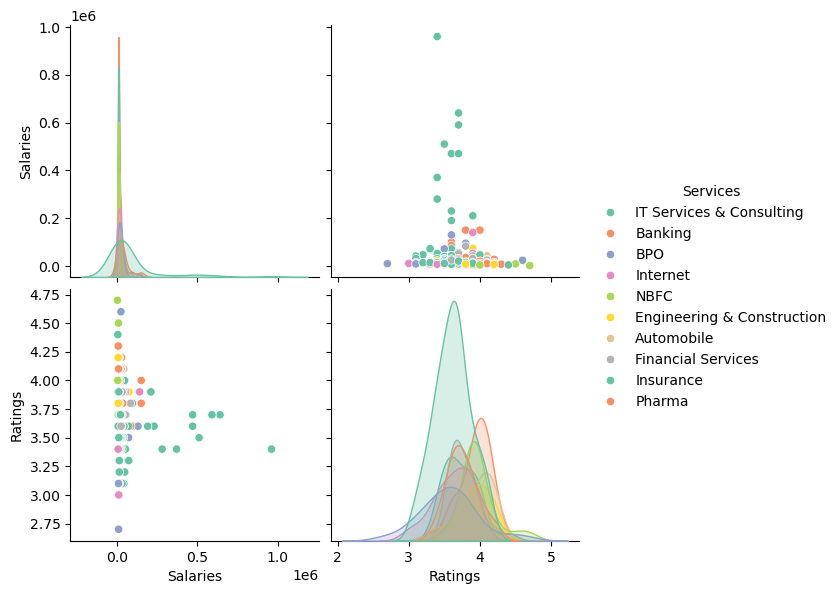

In [197]:
# Select numeric columns for pairplot
plot_cols = ['Salaries', 'Ratings']
plot_cols = [col for col in plot_cols if col in df.columns and df[col].dtype != 'object']

# Find top 10 services
top10_services = df['Services'].value_counts().head(10).index

# Filter only top 10 services
df_top10 = df[df['Services'].isin(top10_services)]

# Create pairplot
sns.pairplot(df_top10, vars=plot_cols, hue='Services', palette='Set2', height=3)
plt.show()


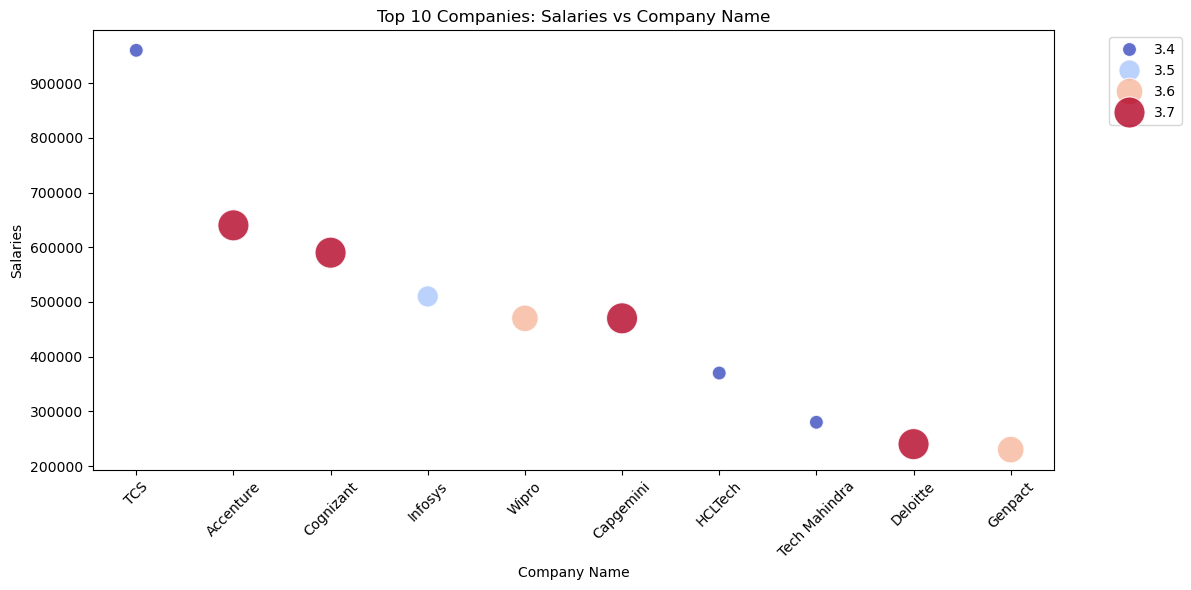

In [199]:
# Take top 10 companies by Salaries
top10_companies = df.sort_values('Salaries', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.scatterplot(data=top10_companies,x='Company_name',y='Salaries',size='Ratings',hue='Ratings',sizes=(100, 500),palette='coolwarm',alpha=0.8)
plt.title('Top 10 Companies: Salaries vs Company Name')
plt.xlabel('Company Name')
plt.ylabel('Salaries')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Insights

## conclusion